In [1]:
# Importing libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
class LinearRegression:

    def __init__(self):
        self.weights = None
        self.bias = None

    def predict(self, X: np.ndarray) -> np.ndarray:
        X = X.astype(float)
        return X @ self.weights + self.bias

    def _loss(self, X: np.ndarray, y: np.ndarray, norm: int):
        X = X.astype(float)
        y = y.astype(float)

        n = X.shape[0]

        y_pred = self.predict(X)
        error = y_pred - y

        loss = np.mean(np.abs(error) ** norm)

        grad_factor = norm * (np.abs(error) ** (norm - 1)) * np.sign(error)

        dw = (1 / n) * X.T @ grad_factor
        db = (1 / n) * np.sum(grad_factor)

        dw = dw.astype(float)
        db = float(db)

        return loss, dw, db

    def fit(
        self,
        X: np.ndarray,
        y: np.ndarray,
        epochs: int = 500,
        learning_rate: float = 0.01,
        norm: int = 2,
        threshold: float = 1e-4,
        lambda_reg: float = 0.01
    ) -> None:

        X = X.astype(float)
        y = y.astype(float)

        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features, dtype=float)
        self.bias = 0.0

        prev_loss = float("inf")

        for _ in range(epochs):
            loss, dw, db = self._loss(X, y, norm)

            dw += lambda_reg * np.sign(self.weights)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

            if abs(prev_loss - loss) < threshold:
                break

            prev_loss = loss


In [21]:
df = pd.read_csv('linear_data.csv')

df = pd.get_dummies(df, drop_first=True)

data = df.to_numpy()

X = data[:, :-1]
y = data[:, -1]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
def z_score(X):
    X = X.astype(float)
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X = (X - X_mean) / X_std
    return X, X_mean, X_std


In [24]:
# Normalizing the data
x_train, x_mean, x_std = z_score(X_train)
x_test = (X_test - x_mean) / x_std

MSE loss:  0.06158811414414839


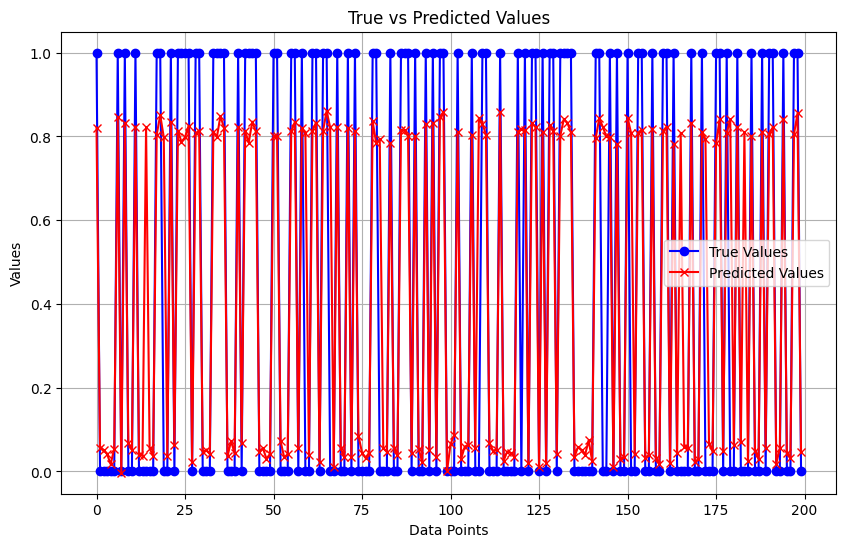

In [28]:
model = LinearRegression()
model.fit(x_train, y_train, epochs=500, learning_rate=0.01, norm=2, threshold=1e-4)
y_pred = model.predict(x_test)
print("MSE loss: ", np.mean((y_pred - y_test) ** 2))

indices = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='True Values', color='blue', marker='o')
plt.plot(indices, y_pred, label='Predicted Values', color='red', marker='x')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs Predicted Values')

plt.legend()
plt.grid(True)
plt.show()